In [66]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

In [67]:
# BISHT Aayush

# Dataset

For this lab, we will use the iris dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), which can be directly downloaded from scikit-learn.

It contains N=150 data points about K=3 different types of iris flowers (setosa, versicolor, and virginica). Each point has D=4 dimension, representing the sepal length, the sepal width, the petal length and the petal width (in centimeters).

In [68]:
# Import and download the dataset
from sklearn import datasets

iris_dataset = datasets.load_iris()

In [69]:
# Define features as X and targets as y
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


We have a float array of features X_iris of size N x D, where N is the number of points and D the dimensionality of the features, and an integer array of labels y_iris of size N.

Let's quickly visualize this dataset using only the first two dimensions.

In [70]:
# We create a custom "colormap" so that elements with label 0 have color blue,
# elements with label 1 have color red and elements with label 2 have color green in our figure below.
from matplotlib.colors import ListedColormap

colormap = ListedColormap(['blue', 'red', 'green'])

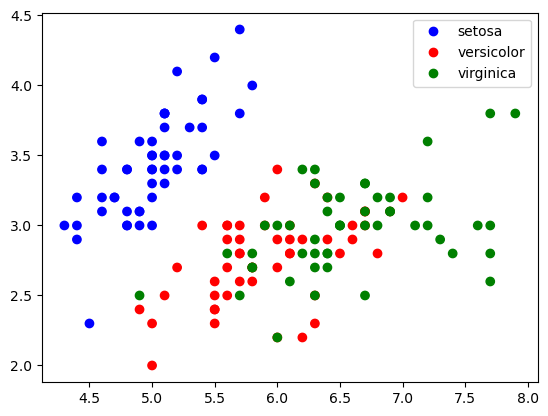

In [71]:
# 2D scatter plot of the dimensions 2 and 3 of the dataset
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

# Unsupervised learning

For now let's assume we don't have access to the labels *y_iris*, and see if we can still identify some structure in the dataset.

## K-Means

**Implement the K-Means algorithm and run it on the whole iris dataset using K=3.**

In [72]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [73]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assigning cluster
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            
            # moving centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # to check if centroids stopped moving
            if (old_centroids == self.centroids).all():
                break

        return cluster_group
        
    def assign_clusters(self, X):
        cluster_group = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                # euclidean distance
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
    
        # Go through each cluster
        for type in cluster_type:
            # Find all points that belong to this cluster
            points_in_cluster = []
            for i in range(len(cluster_group)):
                if cluster_group[i] == type:
                    points_in_cluster.append(X[i])
        
            # Calculate the mean (average) of all points in this cluster
            # Sum up all the points
            sum_of_points = points_in_cluster[0]  # Start with the first point
            for j in range(1, len(points_in_cluster)):
                sum_of_points = sum_of_points + points_in_cluster[j]
        
            # Divide by the number of points to get the average
            new_centroid = sum_of_points / len(points_in_cluster)
            new_centroids.append(new_centroid)
    
        return np.array(new_centroids)


In [74]:
iris = load_iris()
X = iris.data  # (150, 4)
y = iris.target

In [75]:
# k=3
kmeans = KMeans(n_clusters=3, max_iter=100)
labels = kmeans.fit_predict(X)

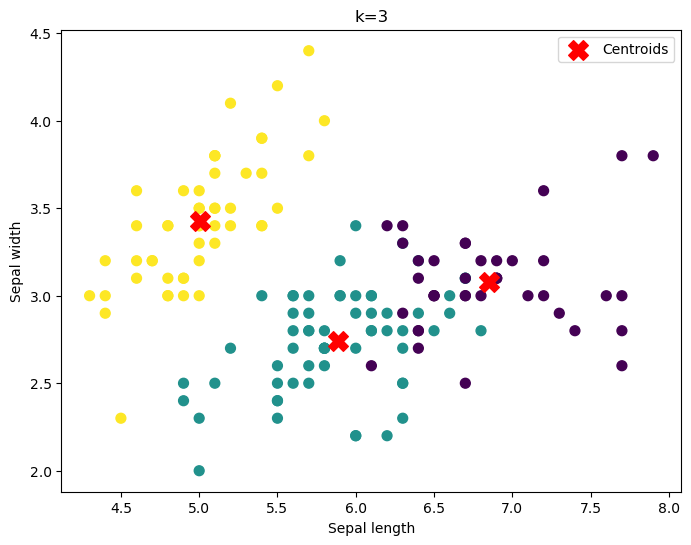

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("k=3")
plt.legend()
plt.show()

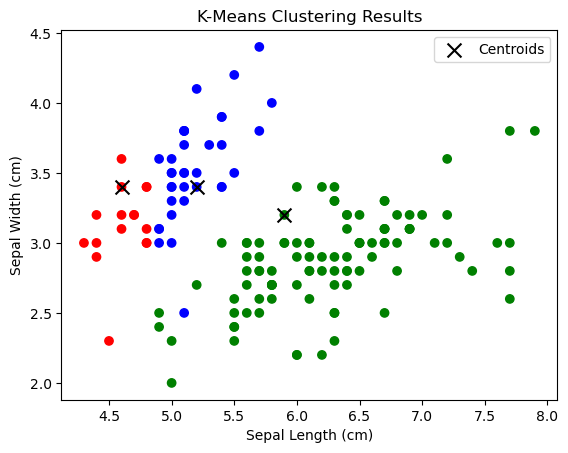

In [77]:
# First, you need a list of labels (0, 1, or 2) for each data point
# This code generates that list based on your final centroids
labels = []
for point in X_iris:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    closest_centroid_index = distances.index(min(distances))
    labels.append(closest_centroid_index)

# Now, plot the results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use the same colors as before: blue, red, green
colormap = ListedColormap(['blue', 'red', 'green'])

# Create the scatter plot using the first two features
# c=labels tells matplotlib to color the points based on your K-Means results
plt.scatter([p[0] for p in X_iris], [p[1] for p in X_iris], c=labels, cmap=colormap)

# Plot the final centroids on top as black 'x' marks
plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], c='black', marker='x', s=100, label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

**Display only the first 2 dimensions as in the figure above, with color points based on their assigned clusters. Do you have a result consistent with the true flower categories?**

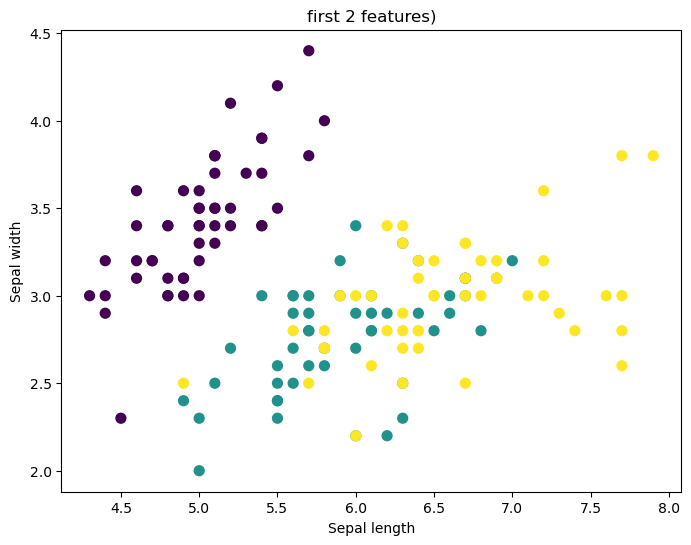

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("first 2 features)")
plt.show()

Now you may use the scikit-learn implementation sklearn.cluster.KMeans if you wish (you don't have to, but it will probably be easier with this class).

**Plot the "inertia" with respect to the number of clusters after running KMeans with different numbers of clusters. Here, "inertia" means the objective $\sum_{n=1}^N \lVert \mathbf{x}_n - \mathbf{c}_{a(\mathbf{x}_n)}\rVert_2^2$**

You don't have to compute the inertia manually, there is a way to obtain it directly if you look at the documentation of the class sklearn.cluster.KMeans

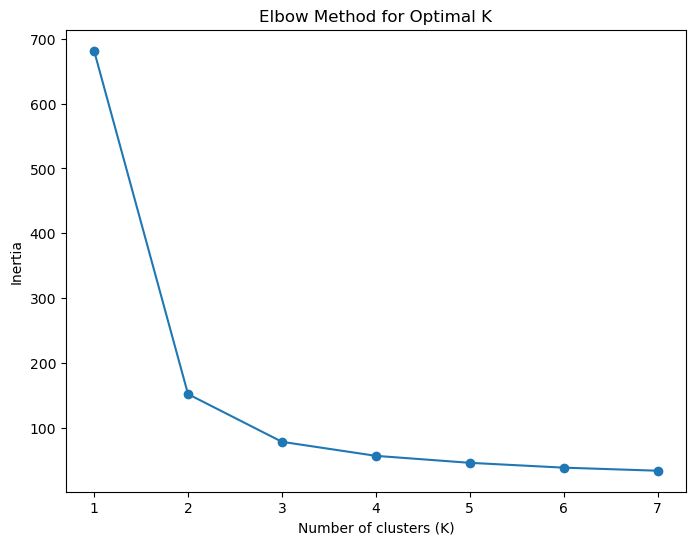

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X, _ = load_iris(return_X_y=True)

inertias = []
K_range = range(1, 8)
for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)  

plt.figure(figsize=(8,6))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

**If we didn't know how many clusters we needed, could we infer this number from this figure?**

**Did you think about running KMeans several times to make sure we don't obtain different results (and thus different inertia) for a given number of clusters?**

Don't actually bother showing me that you did, it won't be graded anyway. But ideally, this is something that you should have thought about.

## Not K-Means

Let's get a new (generated) dataset.

In [80]:
X_moons, y_moons = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

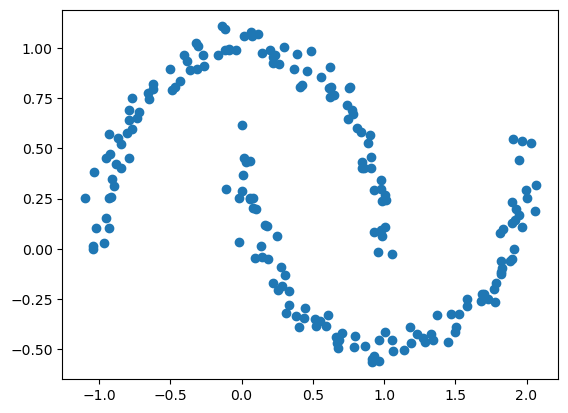

In [81]:
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

**How many groups of points would a human probably intuitively identify here?**

In [82]:
# 2 groups

**Run K-Means on this dataset with the number of clusters you suggested.**

(To display the result with a code similar to previously, you may need to define a new colormap with only two colors).

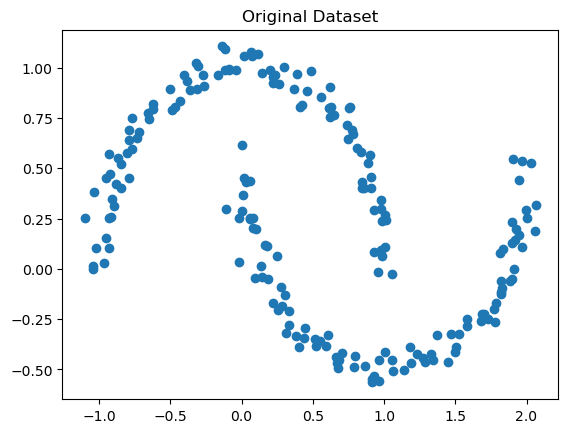

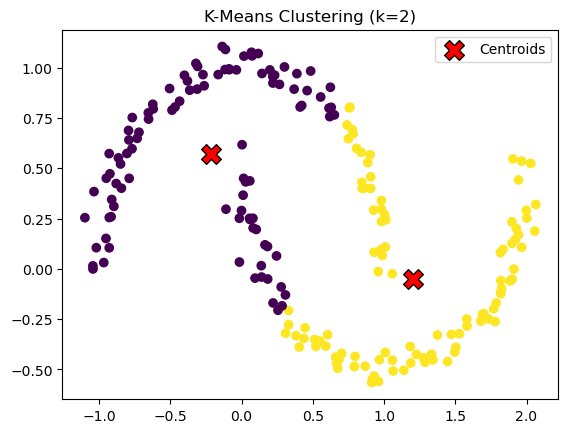

In [83]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# generating dataset
X_moons, y_moons = make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

# original data
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.title("Original Dataset")
plt.show()

# k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_moons)
y_pred = kmeans.predict(X_moons)

# plotting clusters
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='X', s=200, c='red', edgecolors='black', label='Centroids')
plt.title("K-Means Clustering (k=2)")
plt.legend()
plt.show()

**Are the "intuitive" clusters correctly identified? Why?**

No.
Because K-means finds the centroid around a cluster. But in this case the shape is crescent, so although we intuitively see 2 clusters/curve seperated by some distance, but for Kmeans it will do the clustering by finding centroid through euclidean norm.

In a future class (and lab), we will cover other clustering algorithms that may be more suitable for situations like this.

# Supervised learning

## K-nearest neighbors

Now let's go back to our Iris dataset. Remember that until now, we have not used *y_iris* (defined in the 3rd cell of this notebook), as in an unsupervised learning setting, we don't have access to labels.

Let's now switch to a supervised learning setting.

First, let's divide the data into a training set, that we will use as a reference to make predictions, and a testing set, for which we wish to make predictions.

If you look at the labels, you can see that they are sorted. We will thus start by shuffling the dataset, so that we do not have only 1 class in the testing set.

In [84]:
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_iris_shuffled, y_iris_shuffle = shuffle(X_iris, y_iris, random_state=42)

Now, let's use for example the first 100 elements of the dataset and their labels  as training points, and the last 50 as testing points.

**Divide the dataset into a training set and a testing set.**

In [85]:
# First 100 samples for training
X_train = X_iris_shuffled[:100]
y_train = y_iris_shuffled[:100]

# Last 50 samples for testing
X_test = X_iris_shuffled[100:]
y_test = y_iris_shuffled[100:]

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")



Training set size: 100
Testing set size: 50


**Implement a B-nearest neighbor classifier, that uses the training set as reference points and can be used to make predict the class of the testing set.**

(I called it a B-nearest neighbor classifier as opposed to K-nearest neighbor in order not to induce confusion with the K for K-Means, it is not the same thing at all in this context.)

You may use a number of neighbors B=3 if it's more convenient.

In [86]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# training the classifier
knn_classifier.fit(X_train, y_train)

print("\nBClassifier trained with B=3 neighbors")


BClassifier trained with B=3 neighbors


**Use your classifier to predict the classes of the 50 samples in the testing set.**

**Compare these predictions with actual answers, the labels in the testing set. What is the accuracy, i.e. the percentage of correct predictions?**

In [87]:
y_pred = knn_classifier.predict(X_test)

print("\nPredictions made on test set")
print(f"Predicted labels: {y_pred}")
print(f"Actual labels:    {y_test}")

correct_predictions = 0
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        correct_predictions += 1

accuracy = (correct_predictions / len(y_test)) * 100
print(f"Accuracy: {accuracy:.2f}%")


Predictions made on test set
Predicted labels: [0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
Actual labels:    [0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]
Accuracy: 96.00%


**Do the same thing, this time using the sklearn classifier. Do you get a comparable result?**

In [88]:
sklearn_accuracy = knn_classifier.score(X_test, y_test) * 100

print(f"\nUsing sklearn's built-in score method:")
print(f"Accuracy: {sklearn_accuracy:.2f}%")

print("\nCOmparing Results")
print(f"manual calculation: {accuracy:.2f}%")
print(f"Sklearn calculation: {sklearn_accuracy:.2f}%")
print("Yes! The results are identical.")


Using sklearn's built-in score method:
Accuracy: 96.00%

COmparing Results
manual calculation: 96.00%
Sklearn calculation: 96.00%
Yes! The results are identical.


**You (should have) obtained a fairly good result. Is machine learning that simple?**

I will answer this one for you: in general, **no**.

This was a "toy" dataset, that was extremely simple (after all, this was the first class of machine learning). In reality, most problems you are likely to work on are much more complex.

As an example, let's try using the same approach on an another dataset available from the Olivetti faces dataset (https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset)

In [89]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

It represents faces of different people as arrays/vectors of pixels. Let's have a look at a couple of examples (don't bother too much with the code below, this is just to show you a more difficult problem).

In [90]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, faces.images, faces.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title("Person: #%i" % label)

The 4 images above are 4 distinct photographs of the same person, labeled person 0.

Let's again divide the dataset into a train/test split, and use a nearest neighbors classifier to make predictions.

In [91]:
from sklearn.model_selection import train_test_split

# I suffle and split my dataset at the same time
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, test_size=0.5, shuffle=True, random_state=42
)

In [92]:
# We "train" the classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 71.5%


To be honest, this is already quite good, and actually much better than what I was expecting before running this code.

However, I wouldn't really want a system that has a 30% chance of failure of misidentify people to screen passengers at an airport. Depending on the application, even a 0.1% of failure may be too much. For example, I would not want my autonomous car to have a 0.1% chance of running a red light.

So (un?)fortunately, it looks like our machine learning journey is not over yet.

See you next class.